In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import io, base64, os, json, re 
import pandas as pd
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')

In [8]:
# path_to_market_data = '/dataset/^GSPC.csv'

# create an MACD indicators
def MACD(df, feature, fast=9, medium=12, long=26):
    # WARNING - Feed data in ascending order only (i.e. first row should be your oldest print)
    
    tmp_df = df.copy()
    
    
    tmp_df['EXP1'] = tmp_df[feature].ewm(span=medium, adjust=False).mean()
    tmp_df['EXP2'] = tmp_df[feature].ewm(span=long, adjust=False).mean()
    tmp_df['MACD'] = tmp_df['EXP1']-tmp_df['EXP2']
    tmp_df['EXP3'] = tmp_df['MACD'].ewm(span=fast, adjust=False).mean()
    tmp_df['MACD_Hist'] = tmp_df['MACD'] - tmp_df['EXP3']
    
    return tmp_df

In [12]:
# S&P 500
sp500_df = pd.read_csv('dataset/GSPC.csv')
sp500_df['Date'] = pd.to_datetime(sp500_df['Date'])

sp500_df = sp500_df[['Date','Adj Close']]
sp500_df.columns = ['Date','SP500 Close'] # create 2 columns for our table
print(np.min(sp500_df['Date']), np.max(sp500_df['Date']))
sp500_df = sp500_df.sort_values('Date',ascending=True) # dates asorted
sp500_df.tail()

1927-12-30 00:00:00 2019-10-04 00:00:00


,Date,SP500 Close
23044,2019-09-30,2976.739990
23045,2019-10-01,2940.250000
23046,2019-10-02,2887.610107
23047,2019-10-03,2910.629883
23048,2019-10-04,2952.010010


In [15]:
# Case-Shiller U.S. National Home Price Index (CSUSHPINSA)

caseshill_df = pd.read_csv('dataset/CSUSHPINSA.csv')
caseshill_df['DATE'] = pd.to_datetime(caseshill_df['DATE'])

caseshill_df.columns = ['Date', 'Case-Shiller'] # create 2 columns for our table
caseshill_df = caseshill_df.sort_values('Date')
print('caseshill_df:',np.min(caseshill_df['Date']),np.max(caseshill_df['Date']))
caseshill_df.tail()

caseshill_df: 1987-01-01 00:00:00 2019-07-01 00:00:00


,Date,Case-Shiller
386,2019-03-01,206.088
387,2019-04-01,207.998
388,2019-05-01,209.690
389,2019-06-01,210.898
390,2019-07-01,211.715


In [17]:
# Average Hourly Earnings of Production and Nonsupervisory Employees

avghourly_df = pd.read_csv('dataset/AHETPI.csv')
avghourly_df['DATE'] = pd.to_datetime(avghourly_df['DATE'])
avghourly_df.columns = ['Date', 'AHETPI']
avghourly_df = avghourly_df.sort_values('Date')
print('avghourly_df:',np.min(avghourly_df['Date']),np.max(avghourly_df['Date']))
avghourly_df.tail()

avghourly_df: 1964-01-01 00:00:00 2019-09-01 00:00:00


,Date,AHETPI
664,2019-05-01,23.38
665,2019-06-01,23.43
666,2019-07-01,23.51
667,2019-08-01,23.61
668,2019-09-01,23.65


In [19]:
# Consumer Price Index for All Urban Consumers

cpi_df = pd.read_csv('dataset/CUSR0000SEHC.csv')
cpi_df['DATE'] = pd.to_datetime(cpi_df['DATE'])
cpi_df.columns = ['Date', 'CPI']
cpi_df = cpi_df.sort_values('Date')
print('cpi_df:', np.min(cpi_df['Date']), np.max(cpi_df['Date']))
cpi_df.tail()

cpi_df: 1983-01-01 00:00:00 2019-08-01 00:00:00


,Date,CPI
435,2019-04-01,323.669
436,2019-05-01,324.513
437,2019-06-01,325.518
438,2019-07-01,326.317
439,2019-08-01,327.046


## Now to plot all dataset

In [20]:
cut_off_date = '1988-01-01'

sp500_df_tmp = sp500_df.copy() # create copy of df
caseshill_df_tmp = caseshill_df.copy() # create copy of df
avghourly_df_tmp = avghourly_df.copy() # create copy of df
cpi_df_tmp = cpi_df.copy() # create copy of df

sp500_df_tmp = sp500_df_tmp[sp500_df_tmp['Date'] >= cut_off_date]
caseshill_df_tmp = caseshill_df_tmp[caseshill_df_tmp['Date'] >= cut_off_date]
avghourly_df_tmp = avghourly_df_tmp[avghourly_df_tmp['Date'] >= cut_off_date]
cpi_df_tmp = cpi_df_tmp[cpi_df_tmp['Date'] >= cut_off_date]

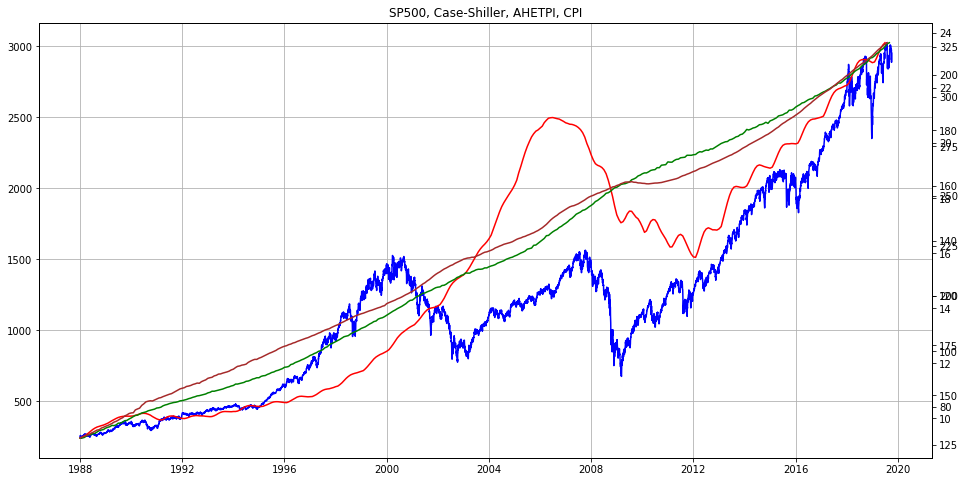

In [22]:
# join both datasets together

fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(sp500_df_tmp['Date'], sp500_df_tmp['SP500 Close'] , color='blue', label='SP500_Close')
plt.title('SP500, Case-Shiller, AHETPI, CPI')
plt.grid()

# get new axis
ax2 = ax.twinx()
plt.plot(caseshill_df_tmp['Date'], caseshill_df_tmp['Case-Shiller'] , color='red', label='Case-Shiller')

# get new axis
ax3 = ax.twinx()
plt.plot(avghourly_df_tmp['Date'], avghourly_df_tmp['AHETPI'] , color='green', label='AHETPI')

# get new axis
ax4 = ax.twinx()
plt.plot(cpi_df_tmp['Date'], cpi_df_tmp['CPI'] , color='brown', label='CPI')
 
plt.show()

## Adjusting for 2012 = 100

In [23]:
sp500_df_tmp[sp500_df_tmp['Date'] == '2012-01-03']

,Date,SP500 Close
21097,2012-01-03,1277.060059


In [24]:
print(100/1277.060059)

0.07830485284952445


In [26]:
sp500_df_tmp['SP500 Close-adj'] = sp500_df_tmp['SP500 Close'] * 0.07830485284952445

In [27]:
caseshill_df_tmp[caseshill_df_tmp['Date'] == '2012-01-01']

,Date,Case-Shiller
300,2012-01-01,134.164


In [28]:
print(100/134.164)

0.7453564294445605


In [29]:
caseshill_df_tmp['Case-Shiller-adj'] = caseshill_df_tmp['Case-Shiller'] * 0.7453564294445605

In [30]:
avghourly_df[avghourly_df['Date'] == '2012-01-01']

,Date,AHETPI
576,2012-01-01,19.58


In [31]:
print(100/19.58)

5.107252298263535


In [32]:
avghourly_df_tmp['AHETPI-adj'] = avghourly_df_tmp['AHETPI'] * 5.107252298263535

In [33]:
cpi_df[cpi_df['Date'] == '2012-01-01']

,Date,CPI
348,2012-01-01,262.366


In [34]:
print(100/262.366)

0.3811469473940983


In [35]:
cpi_df_tmp['CPI-adj'] = cpi_df_tmp['CPI'] * 0.3811469473940983

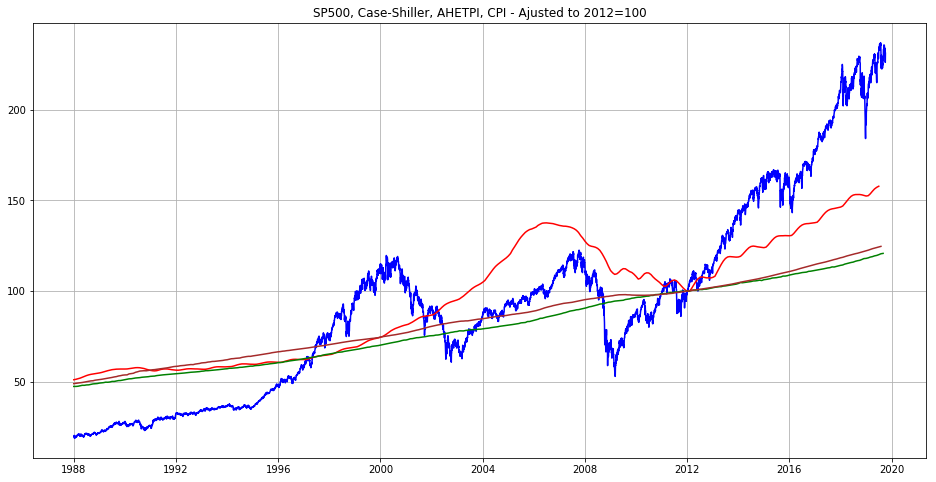

In [36]:
# join both datasets together

fig, ax = plt.subplots(figsize=(16, 8))
plt.plot(sp500_df_tmp['Date'], sp500_df_tmp['SP500 Close-adj'] , color='blue', label='SP500_Close')
plt.title('SP500, Case-Shiller, AHETPI, CPI - Ajusted to 2012=100')
 
plt.plot(caseshill_df_tmp['Date'], caseshill_df_tmp['Case-Shiller-adj'] , color='red', label='Case-Shiller')
 
plt.plot(avghourly_df_tmp['Date'], avghourly_df_tmp['AHETPI-adj'] , color='green', label='AHETPI')
 
plt.plot(cpi_df_tmp['Date'], cpi_df_tmp['CPI-adj'] , color='brown', label='CPI')

plt.grid()
plt.show()

In [37]:
# VNQ
vnq_df = pd.read_csv(path_to_market_data + 'VNQ.csv')
vnq_df['Date'] = pd.to_datetime(vnq_df['Date'])

vnq_df = vnq_df[['Date','Adj Close']]
vnq_df.columns = ['Date', 'VNQ_Close']
print(np.min(vnq_df['Date'] ),np.max(vnq_df['Date'] ))
vnq_df = vnq_df.sort_values('Date', ascending=True) # sort in ascending date order
vnq_df.tail()

FileNotFoundError: File b'/dataset/^GSPC.csvVNQ.csv' does not exist